# Model Making Process

## Preprocess the data

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import platform
import os
import time

print('Python ver:', platform.python_version())
print('Scikit-learn ver:', sklearn.__version__)
print('Pandas ver:', pd.__version__)
print('Numpy ver:', np.__version__)

Python ver: 3.7.3
Scikit-learn ver: 1.0.2
Pandas ver: 1.3.5
Numpy ver: 1.19.4


### Access the Dataset

In [2]:
# Read csv and check the data
cwd = os.path.dirname(os.path.abspath('__file__'))
dataset_dir = os.path.join(cwd, '..', 'Transformed dataset')
mean_path = os.path.join(dataset_dir, 'transformed_mean.csv')
var_path = os.path.join(dataset_dir, 'transformed_var.csv')

mean_csv = pd.read_csv(mean_path)
var_csv = pd.read_csv(var_path)

In [3]:
mean_csv.head()

,Unnamed: 0,xpos,ypos,zpos,xvel,yvel,zvel,xacc,yacc,zacc,label
0,0,-0.132441,1.818894,1.126524,-0.034340,-0.008131,-0.254972,-0.062188,-0.022162,-0.127762,0
1,1,-0.144392,1.793557,1.118971,-0.022590,-0.038763,-0.215774,-0.130912,-0.094322,-0.156462,0
2,2,-0.309730,1.736425,1.058666,0.008053,-0.014171,-0.241596,-0.187329,-0.094175,-0.304099,0
3,3,-0.312120,1.785316,1.098358,-0.016384,-0.023224,-0.176972,-0.147660,-0.086541,-0.152001,0
4,4,-0.231677,1.737191,1.036649,-0.033658,0.015930,-0.182137,-0.022553,0.011463,0.136443,0


In [4]:
mean_csv.count()

Unnamed: 0    520
xpos          520
ypos          520
zpos          520
xvel          520
yvel          520
zvel          520
xacc          520
yacc          520
zacc          520
label         520
dtype: int64

In [5]:
var_csv.head()

,Unnamed: 0,xpos,ypos,zpos,xvel,yvel,zvel,xacc,yacc,zacc,label
0,0,0.001940,0.008719,0.134980,0.010190,0.007413,0.122343,0.010610,0.014236,0.065308,0
1,1,0.002276,0.010267,0.081638,0.044725,0.012691,0.232494,0.042590,0.039106,0.189655,0
2,2,0.005804,0.017488,0.138591,0.110522,0.009268,0.282040,0.071227,0.039771,0.189879,0
3,3,0.003112,0.008101,0.095979,0.042904,0.005863,0.110072,0.039747,0.021820,0.072890,0
4,4,0.000865,0.005119,0.073720,0.003504,0.016209,0.186231,0.003395,0.022270,0.218428,0


In [6]:
var_csv.count()

Unnamed: 0    520
xpos          520
ypos          520
zpos          520
xvel          520
yvel          520
zvel          520
xacc          520
yacc          520
zacc          520
label         520
dtype: int64

### Merging the dataset into a single DataFrame

In [7]:
mean_csv = mean_csv.drop(columns=["label"])
mean_csv = mean_csv.add_suffix("_mean")
mean_csv.columns = mean_csv.columns.str.replace("Unnamed: 0_mean", "index")
mean_csv.columns

Index(['index', 'xpos_mean', 'ypos_mean', 'zpos_mean', 'xvel_mean',
       'yvel_mean', 'zvel_mean', 'xacc_mean', 'yacc_mean', 'zacc_mean'],
      dtype='object')

In [8]:
var_csv = var_csv.add_suffix("_var")
var_csv.columns = var_csv.columns.str.replace("Unnamed: 0_var", 'index')
var_csv.columns = var_csv.columns.str.replace("label_var", 'label')
var_csv.columns

Index(['index', 'xpos_var', 'ypos_var', 'zpos_var', 'xvel_var', 'yvel_var',
       'zvel_var', 'xacc_var', 'yacc_var', 'zacc_var', 'label'],
      dtype='object')

In [9]:
merged = mean_csv.merge(var_csv, on='index')
merged.columns

Index(['index', 'xpos_mean', 'ypos_mean', 'zpos_mean', 'xvel_mean',
       'yvel_mean', 'zvel_mean', 'xacc_mean', 'yacc_mean', 'zacc_mean',
       'xpos_var', 'ypos_var', 'zpos_var', 'xvel_var', 'yvel_var', 'zvel_var',
       'xacc_var', 'yacc_var', 'zacc_var', 'label'],
      dtype='object')

In [10]:
merged.count()

index        520
xpos_mean    520
ypos_mean    520
zpos_mean    520
xvel_mean    520
yvel_mean    520
zvel_mean    520
xacc_mean    520
yacc_mean    520
zacc_mean    520
xpos_var     520
ypos_var     520
zpos_var     520
xvel_var     520
yvel_var     520
zvel_var     520
xacc_var     520
yacc_var     520
zacc_var     520
label        520
dtype: int64

### Optional cell

Run this cell only if you want to export the DataFrame into a csv to work in another machine or workspace

In [11]:
# merged.to_csv('merged.csv', index=True) # Keep in mind that the new csv will have it's index.

## Making the model

### Assign variables

In [12]:
features = merged.drop(['label', 'index'], axis=1)
features.columns

Index(['xpos_mean', 'ypos_mean', 'zpos_mean', 'xvel_mean', 'yvel_mean',
       'zvel_mean', 'xacc_mean', 'yacc_mean', 'zacc_mean', 'xpos_var',
       'ypos_var', 'zpos_var', 'xvel_var', 'yvel_var', 'zvel_var', 'xacc_var',
       'yacc_var', 'zacc_var'],
      dtype='object')

In [13]:
X = features.values
X

array([[-0.13244105,  1.81889426,  1.1265242 , ...,  0.01061019,
         0.01423574,  0.06530786],
       [-0.14439181,  1.79355669,  1.1189715 , ...,  0.04259027,
         0.03910582,  0.18965507],
       [-0.30973048,  1.73642539,  1.05866555, ...,  0.07122708,
         0.03977111,  0.18987909],
       ...,
       [-0.12503728,  1.61260741,  0.79370929, ...,  0.01905062,
         0.1432279 ,  2.42943007],
       [-0.60070165,  1.81983869,  0.64153709, ...,  0.06443295,
         0.0292528 ,  0.5645309 ],
       [-0.11123291,  1.33219778,  0.69740668, ...,  0.00655822,
         0.09484189,  0.62464408]])

In [14]:
Y = merged['label'].values
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### K-Fold test

In [15]:
model_to_evaluate = []
model_to_evaluate.append(('KNN', KNeighborsClassifier(), 'K-nearest Neighbor'))
model_to_evaluate.append(('DT', DecisionTreeClassifier(), 'DecisionTree'))
model_to_evaluate.append(('NB', GaussianNB(), 'Gaussian Naive-Bayes'))
model_to_evaluate.append(('SVM', SVC(), 'Support Vector Machine'))

In [16]:
results=[]
names=[]

for name, model, full_name in model_to_evaluate:
    kfold = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_result)
    names.append(name)
    print(f'Akurasi {name}: {cv_result.mean()} dengan std dev {cv_result.std()}')
    print()

Akurasi KNN: 0.9692932916971188 dengan std dev 0.023110029953269457

Akurasi DT: 0.9730804154762697 dengan std dev 0.007194972453406428

Akurasi NB: 0.9461608309525391 dengan std dev 0.005373173902573761

Akurasi SVM: 0.9808429118773946 dengan std dev 0.027092213838565058



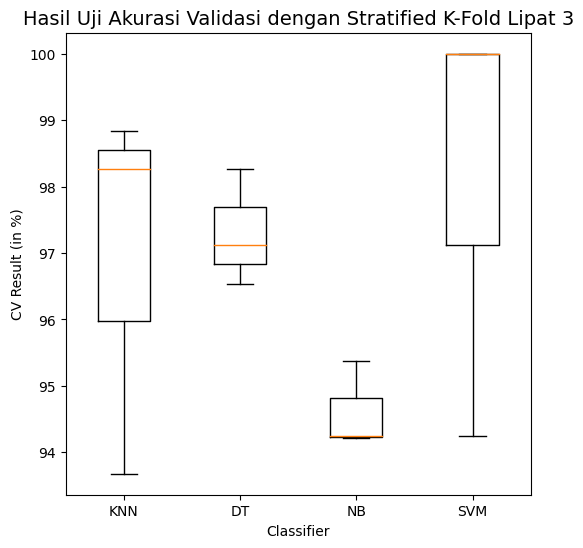

In [17]:
plt.figure(figsize=(6,6))
plt.boxplot(list(map(lambda item: item*100, results)), labels=names)
plt.title('Hasil Uji Akurasi Validasi dengan Stratified K-Fold Lipat 3', fontdict={'fontweight': 'normal', 'fontsize':'14'})
plt.xlabel('Classifier')
plt.ylabel('CV Result (in %)')
# plt.savefig('CV Result.png', dpi=300)
plt.show()


### Test each of the algorithm

In [18]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.10, random_state=1)

In [19]:
plot_label = ['Tidak Jatuh', 'Jatuh']

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        14

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.93      0.93      0.93        14

    accuracy                           0.96        52
   macro avg       0.95      0.95      0.95        52
weighted avg       0.96      0.96      0.96        52

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.88      1.00      0.93        14

    accuracy                           0.96        52
   macro avg       0.94      0.97      0.95        52
weighted avg       0.97      0.96      0.96        52

              preci

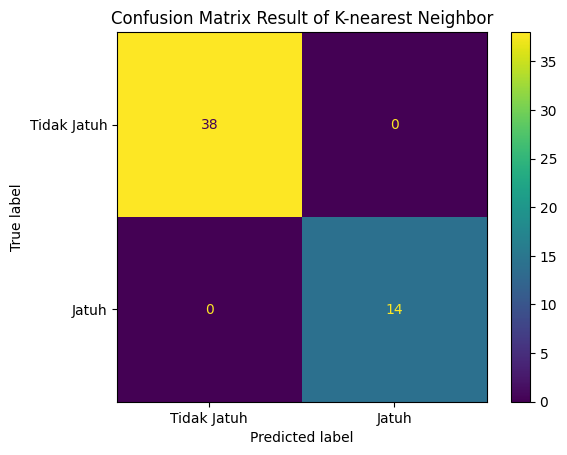

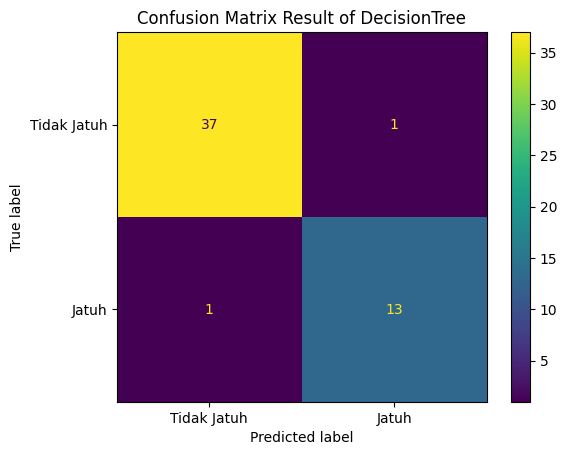

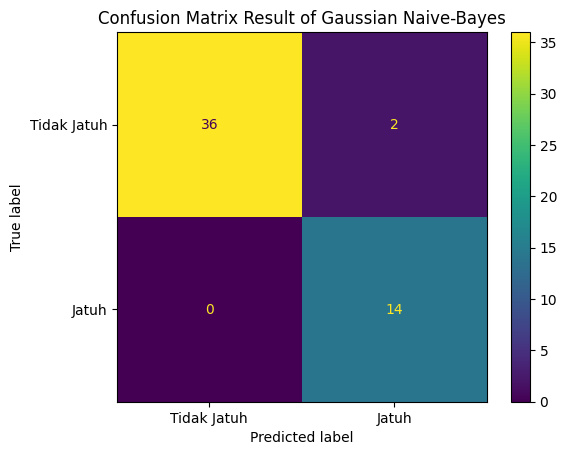

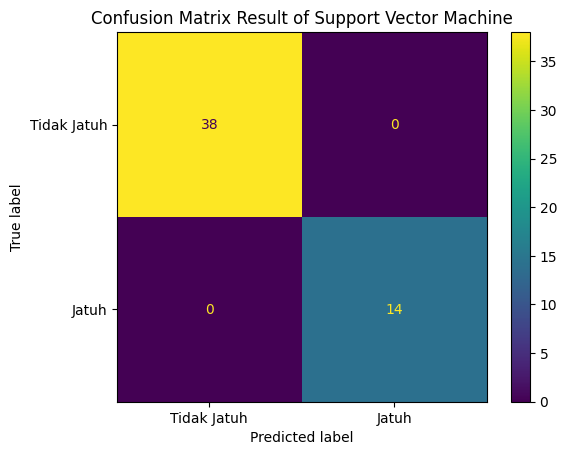

In [20]:
for name, model, full_name in model_to_evaluate:
    clf = model
    clf.fit(X_train, Y_train)
    predictions = clf.predict(X_val)
    print(classification_report(Y_val, predictions))
    disp = ConfusionMatrixDisplay.from_predictions(Y_val, predictions, display_labels=plot_label)
    disp.ax_.set_title(f'Confusion Matrix Result of {full_name}')